In [64]:
import numpy as np
from matplotlib import pyplot as plt
import ionization

In [65]:
dt = 0.3
terms = 4
Uion = 0.5
Z = 1.0
ionizer = ionization.YI(Uion,Z,1e27,0.8e-6/6.28,dt,terms)

In [66]:
Nt = 256
Nx = 4
Ny = 4
E0 = 1e-2
w0 = 1
t0 = Nt*dt/2
tau_L = Nt*dt/4
t = np.einsum('i,j,k',np.linspace(0,(Nt-1)*dt,Nt),np.ones(Nx),np.ones(Ny))
EField = E0*np.exp(-(t-t0)**2/tau_L**2)*np.cos(w0*t)
EField += 0.0*E0*np.exp(-(t-t0)**2/tau_L**2)*np.cos(2*w0*t+np.pi/2)
amp,phase,w0 = ionizer.ExtractEikonalForm(EField)

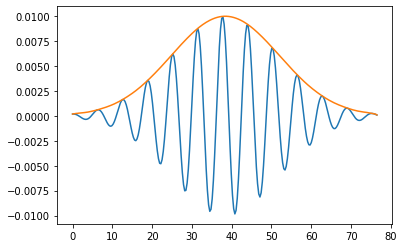

In [67]:
plt.plot(t[:,0,0],EField[:,0,0],t[:,0,0],amp[:,0,0])
plt.show()

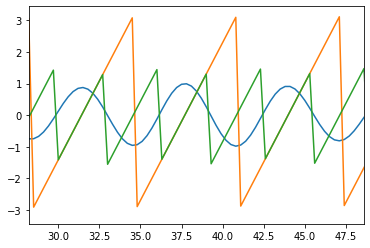

In [68]:
wrapped = phase[:,0,0]%(2*np.pi)
wrapped[np.where(wrapped>np.pi)] -= 2*np.pi
theta = (phase[:,0,0] - 0.5*np.pi)%np.pi - 0.5*np.pi
plt.plot(t[:,0,0],EField[:,0,0]/E0,t[:,0,0],wrapped,t[:,0,0],theta)
plt.xlim(t0-10/w0,t0+10/w0)
plt.show()

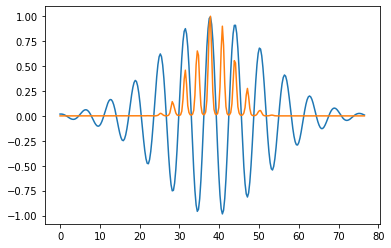

In [69]:
rate = ionizer.InstantaneousRate(EField)
plt.plot(t[:,0,0],EField[:,0,0]/E0,t[:,0,0],rate[:,0,0]/np.max(rate))
plt.show()

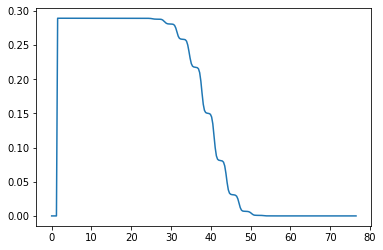

In [70]:
ng = np.ones(EField.shape[1:])
ne = ionizer.GetPlasmaDensity(ng,rate)
plt.plot(t[:,0,0],ne[:,0,0])
plt.show()